Problem Statement  ::
Forecast energy usage of households. - Forecast the electricity consumption of top 3 households with highest number of samples on an hourly basis based on the previous usage pattern. The major features for analysis includes household id, the plans used (standard or dynamic time of use), date, time, meter readings in Kwh and acorn groups


Import required libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
from datetime import datetime
import calendar

In [13]:
df = pd.read_csv('/home/puja/Downloads/Power-Networks-LCL.csv')

In [113]:
df.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
10000,MAC000002,Std,2013-05-09 06:30:00.0000000,0.126,ACORN-A,Affluent
10001,MAC000002,Std,2013-05-09 07:00:00.0000000,0.073,ACORN-A,Affluent
10002,MAC000002,Std,2013-05-09 07:30:00.0000000,0.165,ACORN-A,Affluent
10003,MAC000002,Std,2013-05-09 08:00:00.0000000,0.088,ACORN-A,Affluent
10004,MAC000002,Std,2013-05-09 08:30:00.0000000,0.464,ACORN-A,Affluent
10005,MAC000002,Std,2013-05-09 09:00:00.0000000,0.128,ACORN-A,Affluent
10006,MAC000002,Std,2013-05-09 09:30:00.0000000,0.091,ACORN-A,Affluent
10007,MAC000002,Std,2013-05-09 10:00:00.0000000,0.128,ACORN-A,Affluent
10008,MAC000002,Std,2013-05-09 10:30:00.0000000,0.078,ACORN-A,Affluent
10009,MAC000002,Std,2013-05-09 11:00:00.0000000,0.491,ACORN-A,Affluent


Data Exploration

In [15]:
df.shape

(999971, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999971 entries, 0 to 999970
Data columns (total 6 columns):
LCLid            999971 non-null object
stdorToU         999971 non-null object
DateTime         999971 non-null object
KWh              999971 non-null float64
Acorn            999971 non-null object
Acorn_grouped    999971 non-null object
dtypes: float64(1), object(5)
memory usage: 53.4+ MB


In [104]:
df.isnull().sum()   #crosscheck! though unnecessary

LCLid            0
stdorToU         0
DateTime         0
KWh              0
Acorn            0
Acorn_grouped    0
dtype: int64

Iterated through the description given in the Problem Statements to get the clear picture of what 
each clumn is meant for!?


explore about each attribute, their unique values

In [106]:
df['LCLid'].nunique()

30

So a total of 30 house holds!


In [87]:
df.groupby('LCLid').size()/df['LCLid'].count()*100

LCLid
MAC000002    2.415770
MAC000003    3.546903
MAC000004    3.167692
MAC000006    3.646106
MAC000007    2.504573
MAC000008    2.601275
MAC000009    2.523773
MAC000010    2.504873
MAC000011    2.370469
MAC000012    2.466972
MAC000013    2.961386
MAC000016    1.952357
MAC000018    3.908213
MAC000019    3.907113
MAC000020    3.907913
MAC000021    3.907913
MAC000022    3.907213
MAC000023    3.906913
MAC000024    3.902713
MAC000025    3.906513
MAC000026    3.906513
MAC000027    3.906913
MAC000028    3.215793
MAC000029    3.906413
MAC000030    3.906713
MAC000032    3.906913
MAC000033    3.907113
MAC000034    3.907013
MAC000035    3.902413
MAC000036    1.617547
dtype: float64

In [34]:
df['stdorToU'].nunique()

1

In [35]:
df['stdorToU'].unique()

array(['Std'], dtype=object)

In [36]:
df['DateTime'].nunique()

39095

In [37]:
df['DateTime'].unique()

array(['2012-10-12 00:30:00.0000000', '2012-10-12 01:00:00.0000000',
       '2012-10-12 01:30:00.0000000', ..., '2012-01-30 10:00:00.0000000',
       '2012-01-30 10:30:00.0000000', '2012-01-30 11:00:00.0000000'],
      dtype=object)

In [41]:
df['Acorn'].nunique()

11

In [86]:
df.groupby('Acorn').size()/df['Acorn'].count()*100

Acorn
ACORN-A     6.322483
ACORN-D     3.906513
ACORN-E    33.903383
ACORN-H     7.610721
ACORN-J     7.814827
ACORN-K     8.820856
ACORN-L     2.523773
ACORN-N     2.370469
ACORN-P    11.359829
ACORN-Q    11.460232
ACORN-U     3.906913
dtype: float64

In [38]:
df['Acorn_grouped'].nunique()

4

In [85]:
df.groupby('Acorn_grouped').size()/df['Acorn_grouped'].count()*100

Acorn_grouped
ACORN-U         3.906913
Adversity      36.535160
Affluent       44.132380
Comfortable    15.425547
dtype: float64

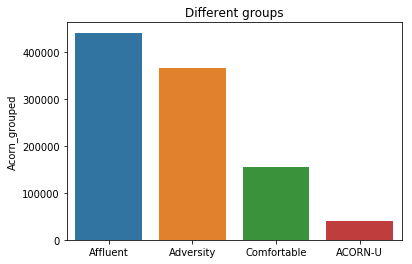

In [77]:
df['Acorn_grouped'].unique()
fig = mplt.figure(figsize=(6,4))
sns.barplot(x = df['Acorn_grouped'].unique(), y=df['Acorn_grouped'].value_counts())
mplt.title("Different groups")
mplt.show()

Insights: They were many affluent : rich

So going through every column is done! 
Prepare the Data ----- kind of Data preprocessing based on our needs and convienience

In [78]:
df2 = pd.read_csv('/home/puja/Downloads/Power-Networks-LCL (copy).csv')

In [79]:
df2['Acorn'] = df2['Acorn'].str.replace('ACORN-', "")


DateTime column -  format is different which is little uncomfortable! let us change it!

In [114]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2['year'] = df2['DateTime'].dt.year
df2['month'] = df2['DateTime'].dt.month
df2['day'] = df2['DateTime'].dt.day
#df2['hour'] = df2['DateTime'].dt.hour
#df2 = df2.drop('hour',axis = 1)
df2['minute'] = df2['DateTime'].dt.minute
df2['date'] = df2['DateTime'].dt.date
format = '%I:%M %p'
df2['time'] = df2['DateTime'].dt.time.apply(lambda x: x.strftime(format))

In [115]:
df2[:3]

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped,year,month,day,date,time,minute
0,MAC000002,Std,2012-10-12 00:30:00,0,A,Affluent,2012,10,12,2012-10-12,12:30 AM,30
1,MAC000002,Std,2012-10-12 01:00:00,0,A,Affluent,2012,10,12,2012-10-12,01:00 AM,0
2,MAC000002,Std,2012-10-12 01:30:00,0,A,Affluent,2012,10,12,2012-10-12,01:30 AM,30


Problem statement : Hourly samples should be more
for this let us consider
    (So, minute = 0)

New insights! 

In [82]:
df2['year'].nunique()

4

In [83]:
df2['year'].unique()

array([2012, 2013, 2014, 2011])

So the Data existing with us was collected from 2011 to 2014 (4 years data)

In [128]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    
    df['DateTime'] = pd.to_datetime(df2['DateTime'])
    df['hour'] = df['DateTime'].dt.hour
    df['dayofweek'] = df['DateTime'].dt.dayofweek
    df['quarter'] = df['DateTime'].dt.quarter
    df['month'] = df['DateTime'].dt.month
    df['year'] = df['DateTime'].dt.year
    df['dayofyear'] = df['DateTime'].dt.dayofyear
    df['dayofmonth'] = df['DateTime'].dt.day
    df['weekofyear'] = df['DateTime'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [129]:
pj = pd.read_csv('/home/puja/Downloads/Power-Networks-LCL.csv')

In [130]:
split_date = '2012-10-12 01:30:00'
pj_train = pj.loc[pj.DateTime <= split_date].copy()
pj_test = pj.loc[pj.DateTime > split_date].copy()

In [136]:
X_train.head(5)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,4,4,10,2012,286,12,41
1,1,4,4,10,2012,286,12,41
24157,13,0,1,2,2012,51,20,8
24158,13,0,1,2,2012,51,20,8
24159,14,0,1,2,2012,51,20,8


In [137]:
pj.head(5)

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent


In [131]:
X_train, y_train = create_features(pj_train, label='KWh')
X_test, y_test = create_features(pj_test, label='KWh')

NameError: name 'reg' is not defined